<a href="https://colab.research.google.com/github/kpenikis/Neuro120/blob/main/HW1_Problem1_AuditoryResponses_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# # Added this section (and filepath when loading data) to execute in Colab instead of Ed
# from google.colab import drive
# drive.mount('/content/drive')
# data_filepath = '/content/drive/MyDrive/^Teaching/^Spring 2024/Assignments/HW1_Problem1/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Section 1: Single neuron response to exposure stimulus

We will first look at the response of a single neuron to the exposure stimulus.

The exposure stimulus repeats the chord pulse at 6 Hz. This means that we can treat each 1/6 of a second as a separate stimulus presentation (a separate trial).

 Below, we load in `spikes_single_neuron` which is an array of numpy arrays, where each inner numpy array contains the spike times (in seconds) for a single trial. This data is for a neuron from an animal in the experimental group, in response to the exposure stimulus. We then plot a raster plot

['spikes_single_neuron', 'binned_spikes_exp', 'binned_spikes_control']


[Text(0.5, 0, 'Time (s)'), Text(0, 0.5, 'Trial Number')]

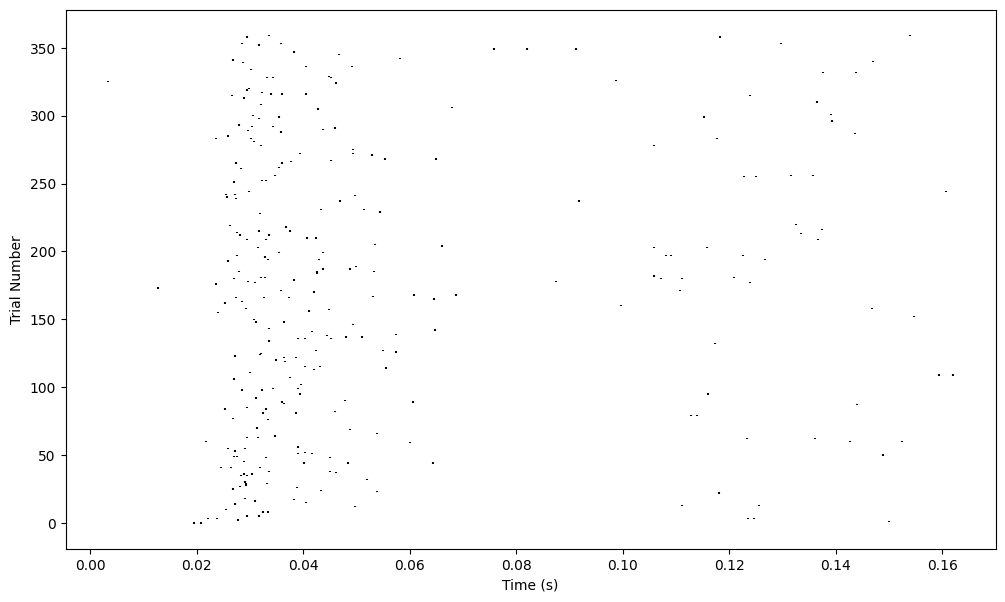

In [5]:
n_trials = 360
data = np.load('exposure_stimulus.npz', allow_pickle=True) # ed
# data = np.load(data_filepath + 'exposure_stimulus.npz', allow_pickle=True) # colab
print(data.files)

spikes_single_neuron = data['spikes_single_neuron']

# Make raster plot
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

# Make raster of this data
ax.eventplot(spikes_single_neuron, colors = 'black')

# Label x and y axes (with units!)
ax.set(xlabel = 'Time (s)', ylabel = 'Trial Number');

## Problem 1a (coding): Plotting a PSTH

To further investigate these responses, **plot a PSTH for this neuron in response to the stimuli**.

We first need to bin the spikes. First, we create an array, `binned_spikes`, where the rows correspond to trials and the columns correspond to different time bins. The number of time bins depends on the width of each time bin, which we can set with `bin_width`. Each entry is the number of spikes in that time bin in that trial.


In [6]:
# Bin spikes (no need for you to do anything)

# Bin width in seconds
bin_width = 5/1000

# Figure out start time of each time bin
bin_edge_times = np.arange(0, 1/6 + bin_width, bin_width)

# Initialize binned_spikes array
binned_spikes = np.zeros((n_trials, len(bin_edge_times) - 1))

# Loop over trials
for i_trial in range(n_trials):

    # Get binned spikes using histogram method
    binned_spikes[i_trial, :], _ = np.histogram(spikes_single_neuron[i_trial], bins = bin_edge_times)

Use the above array `binned_spikes` to compute the PSTH. We want this in units of spikes/second (not spikes/bin).

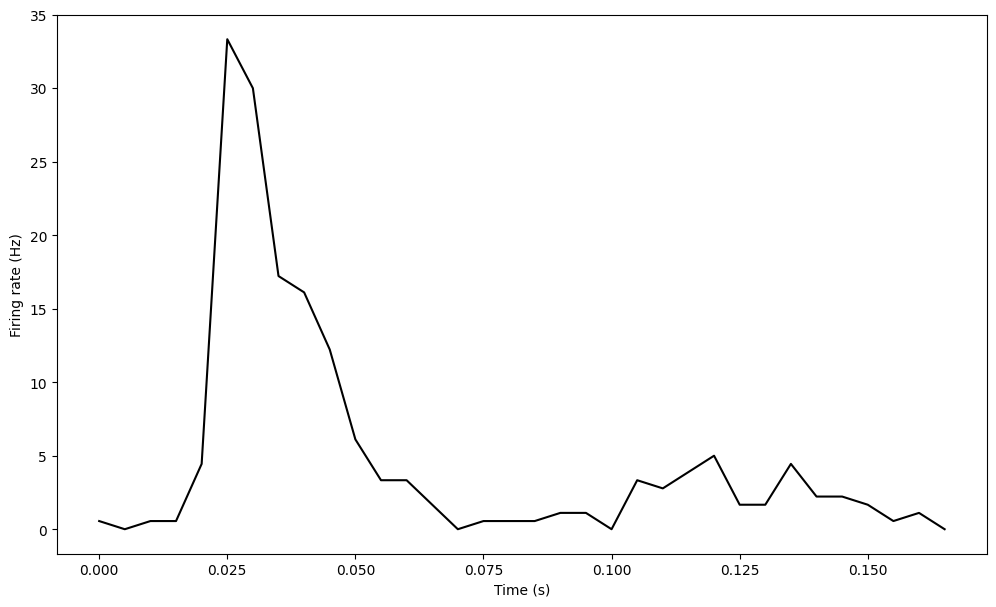

In [7]:
# TODO: Compute PSTH
PSTH = np.mean(binned_spikes, axis = 0) / bin_width

# Plot PSTH
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.plot(np.arange(0, 1/6, bin_width), PSTH, 'k')

# TODO: set axis labels
ax.set(xlabel = 'Time (s)', ylabel = 'Firing rate (Hz)');

## Problem 1b: Interpreting the PSTH


i) Try re-running the previous two code cells with different bin widths. Try .2 ms, 1 ms, 5 ms, 10 ms, 25 ms, and 50 ms. What is the issue with too small bins? Too big bins? About what size bin would you choose to use to convey the average firing rate of this neuron accurately?

ii) Does this neuron seem to respond to the stimulus?

<font color='green'><span style="font-size:larger;">
i) Small bins don't reflect the response well as they capture too much noise. The shape of the PSTH will depend on lot on exact spike times, which makes it really difficult to discern the underlying rate/response.  Big bins smooth over time too much and you lose the meaningful temporal structure of the firing rate. For this PSTH, a bin size of around 3-5 ms appears to strike an appropriate balance.
<br>
<br>
ii) Yes, this neuron responds to the stimulus. The firing rate of the neuron increases when the stimulus is presented.
<br>

# Section 2: Neural population response to exposure stimulus

Let's now look at more neurons in both experimental animals and control animals. In the cell below, we load in `binned_spikes_exp` and `binned_spikes_control`. Each of these is an array with shape (number of neurons x trials x time bin). These bins are 5 ms wide.  `binned_spikes_exp` contains the spiking responses of neurons recorded from animals in the experimental group (animals exposed to the simulus) and `binned_spikes_control` is data recorded from a control group (animals who weren't).


In [8]:
# Set some variables
bin_width = 5/1000
binned_spikes_exp = data['binned_spikes_exp']
binned_spikes_control = data['binned_spikes_control']

### Problem 1c (coding): Computing responses of control and experimental groups

We want to compare the average neural response to the stimulus in the experimental animal neurons to the average response in the control animal neurons. Compute a PSTH for each group and plot them both over time on the same plot to compare. This time it should be averaged over trials and neurons. This gives us information about the response properties of the whole population of neurons. Use `binned_spikes_exp` and `binned_spikes_control`.

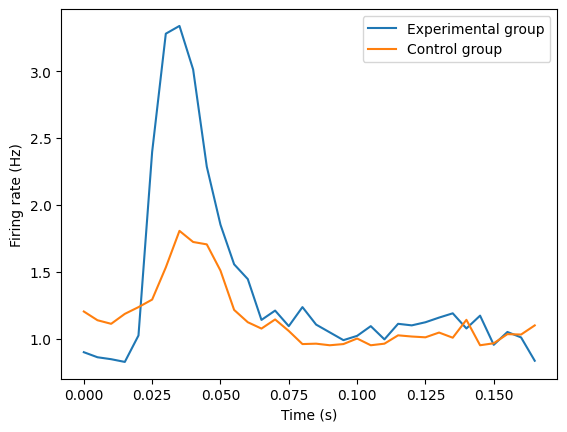

In [9]:
# TODO: compute PSTHs over neurons and trials
PSTH_exp = np.mean(binned_spikes_exp, axis=(0,1 )) / bin_width
PSTH_control = np.mean(binned_spikes_control, axis=(0,1 )) / bin_width

# Visualize PSTHs
fig, ax = plt.subplots(1, 1)

# TODO: Plot the PSTHs (and label the two lines)
t = np.arange(0, 1/6, 5/1000)
ax.plot(t, PSTH_exp, label='Experimental group')
ax.plot(t, PSTH_control, label='Control group')

ax.set(xlabel='Time (s)', ylabel='Firing rate (Hz)')
plt.legend(loc='best');

### Problem 1d: Analyzing response differences between control and experimental groups

i) How many neurons do we have data from in the experimental group? How many for the control group? Show, in code, where/how you can find these numbers.

ii) What differences do you observe between the experimental and control groups? Did neurons become more or less selective to the exposure stimulus?  Are there any differences in responses after the initial peak response?

In [10]:
print(binned_spikes_exp.shape)
print(binned_spikes_control.shape)

(191, 360, 34)
(187, 360, 34)



<font color='green'><span style="font-size:larger;">
i) We have 191 neurons in the experimental group, and 187 in the control group.
<br> <br>
ii) Neurons in the experimental group are more selective to the exposure stimulus - their firing rates are higher in response to the stimulus than the neurons in the control group. There aren't any stark differences after the peak response.

# Section 3: Single neuron response to DMR stimulus

Let's look at a neural response to a different stimulus. This time, the stimulus is a 15 minute 'dynamic moving ripple' (DMR) stimulus. It contains a range of different spectral and temporal modulations. The stimulus can be viewed as a spectrogram, which represents the strength of different auditory frequencies over time. We load in the relevant data below, which contains the following variables: `sp_times`, a list of spiking times in seconds for this neuron; `stim_spectrogram`, a 2D spectrogram of the DMR stimulus (here the rows index different frequencies and the columns index different time points); `stim_freq`, a vector with the frequencies of each row in the spectrogram in Hz; and `stim_time`, a vector with the time of each column in the spectrogram in seconds.

In [11]:
data = np.load('dmr_stimulus_data.npz', allow_pickle=True) # ed
# data = np.load(data_filepath + 'dmr_stimulus_data.npz', allow_pickle=True) # colab

sp_times = data['sp_times']
stim_spectrogram = data['stim_spectrogram']
stim_freq = data['stim_freq']
stim_time = data['stim_time']

Let's visualize the DMR stimulus. Run the cell below to plot the spectrogram of this stimulus for the first 20 s.

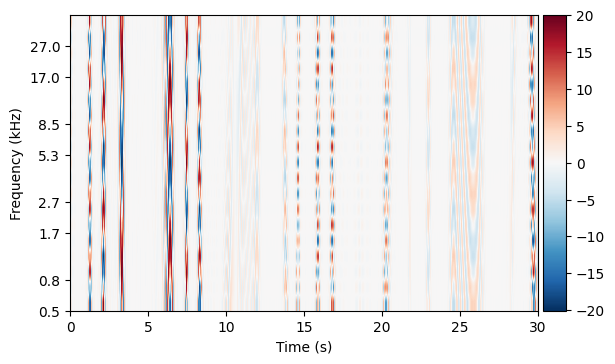

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_spectrogram(spect, time, freq, xlabel = None, ylabel = None, axis = None, max_time = None):
    time, freq = time.flatten(), freq.flatten()

    xlabel, ylabel = xlabel or 'Time (s)', ylabel or 'Frequency (kHz)'
    fig, ax = plt.subplots(1, 1)

    im = ax.imshow(spect, extent=[time[0], time[-1], 0, len(freq)], cmap="RdBu_r")

    yticks = [int(i) for i in ax.get_yticks() if i < len(freq)]
    ylabels = np.round(freq[(yticks,)] / 1000, 1)

    if max_time:
      ax.set_xlim([0, max_time])

    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if axis:
        plt.axis(axis)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    plt.colorbar(im, cax=cax)

# Plot spectrogram of stimulus
plot_spectrogram(stim_spectrogram, stim_time, stim_freq, max_time = 30)

**Side quest:** Edit the code in the previous block so that the stimulus is plotted using a better color scheme. Choose a colormap that is appropriate for the data being displayed.
([Hint 1](https://matplotlib.org/stable/users/explain/colors/colormaps.html), [Hint 2](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow))
</br></br>

### Problem 1e (coding): Computing a spike-triggered average

Generate a spike-triggered average for this neuron that extends 125 ms into the past and 125ms into the future. That is, for each spike, cut out a segment of the stimulus corresponding to the 250ms window centered on the spike, and average these together. The bin width of the stimulus is 5 ms (we get the strength of all frequncies every 5 ms).

We have the actual spike times, whereas we need the binned spikes. There are two options for how to compute the STA:

1) convert to binned spikes at the start (look above in this doc for an example of converting to binned spikes) and compute the STA a very similar way to how we did it before. Hint: you probably want to use the same bin width for spikes as exists for the stimulus.

2) Loop over exact spike times and figure out what stimulus time bin the spike time falls in inside the for loop

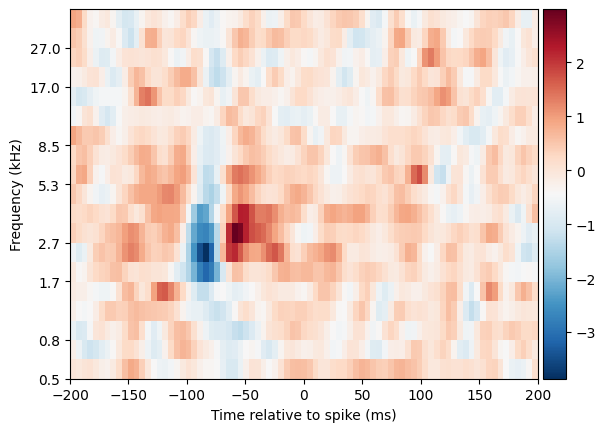

In [23]:
# Determine how long we want the STA to be
# note: binsize should remain 5 ms to match the stimulus spectrogram
STA_length_ms = 400
binsize = 5
STA_length = int(STA_length_ms / 5)
half_length = int(STA_length / 2)

# Initialize STA
STA = np.zeros((stim_freq.shape[0], STA_length+1))

# Compute STA
... # your code here
for sp_time in sp_times:

  # Find which stimulus bin spike falls in
  bin_number =  np.floor(sp_time / (binsize/1000)).astype('int')

  STA += stim_spectrogram[:, (bin_number - half_length) : (bin_number + half_length + 1)]

STA /= len(sp_times)


# Plot results
plot_spectrogram(STA, np.array([-STA_length_ms / 2, STA_length_ms / 2]), stim_freq, xlabel='Time relative to spike (ms)', axis='auto')


### Problem 1f: Interpreting a spike-triggered average

i)  Is the neuron responding to the stimulus that happened far in the past, far in the future, recently in the past, or recently in the future?

ii) What frequency is the neuron most selective to?

iii) According to the STA, would the neuron emit a stronger response to a sustained tone at its preferred frequency, or to a brief tone pip? Approximately how long should a tone be to evoke the largest response?

iv) Without this stimulus and data analysis method to extract the receptive field, how else could we have gotten a sense of what stimuli this neuron responds to?

<font color='green'><span style="font-size:larger;">
i) The neuron is mostly responding to the stimulus in the recent past, from around -100 ms to -25 ms.
<br>
ii) The neuron is most selective around 2.7 kHz.
<br>
iii) The neuron's peak response would be highest to a brief tone pip around 50 ms long.
<br>
iv) We would have had to try out a very large number of sounds, with tone pips of different durations and various combinations of frequencies. We would have to present each stimulus multiple times and randomize the presentation order.